<a href="https://colab.research.google.com/github/ngrisanti/Age-Prediction-from-Photos/blob/main/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS 181Y Final Project: Age Prediction from Photos**
## Nick Grisanti & Josh Cheung

Our project seeks to create a machine learning model to estimate people's age. We would ideally like to be able to give this model and image of a person and have it return a predicted age. Since it is very difficult to guess someone's age based just on a single image, we don't expect the model to be perfect. However, we would like it to be able to get close to the actual age.

This file in particular retreives, preprocesses the data and saves it as a csv file.

In [ ]:
import os
import cv2
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Retrieving and Refining the Data

We got this dataset from [Kaggle](https://www.kaggle.com/datasets/nipunarora8/age-gender-and-ethnicity-face-data-csv?fbclid=IwAR384IVDtUdoea_8hsRJfHLUFIVm8qVOdSNH3_aMw_IEtqzRJoZ9q0kUPkg).

It contains the person's age, a list of pixel values of the image, and some extra information that we will not be using. Note that we're using the pixel values instead of the actual image to avoid having to download and store all of the images.

In [ ]:
faces_df = pd.read_csv("drive/Shared drives/cs_for_inquiry/age_gender.csv")
faces_df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


The pixel data for each image is stored as a string of space-separated values, which is yucky. The next several cells convert this to a useable format.

In [ ]:
def pix_str2array(string):
    """takes a string of the form '123 456 45 32' and returns a numpy array of its values [123, 456, 45, 32]"""
    pix_array = np.array([])
    current_pix = ""
    while len(string) > 0:
        if string[0] != " ":
            current_pix += string[0]
        else:
            pix_array = np.append(pix_array, int(current_pix))
            current_pix = ""
        string = string[1:]
        if len(string) == 0:
            pix_array = np.append(pix_array, int(current_pix))
    return pix_array    

In [ ]:
pix_array = pix_str2array(faces_df.loc[0,"pixels"])
print(pix_array)
print(len(pix_array))

[129. 128. 128. ... 146. 146. 146.]
2304


In [ ]:
def pix_array2matrix(array):
  """takes a numpy array and creates n x 48 numpy array of its values"""
  pix_matrix = []
  while len(array) > 0:
    current_row = np.array([])
    for _ in range(48):
      current_row = np.append(current_row, array[0])
      array = array[1:]
    pix_matrix.append(current_row)
  return np.array(pix_matrix)

In [ ]:
pix_matrix = pix_array2matrix(pix_array)
print(pix_matrix)
print(len(pix_matrix))
print(len(pix_matrix[0]))

[[129. 128. 128. ... 118.  99.  53.]
 [130. 129. 128. ... 117.  98.  52.]
 [131. 129. 130. ... 114.  97.  50.]
 ...
 [121. 138. 147. ... 151. 150. 148.]
 [117. 137. 146. ... 149. 148. 148.]
 [115. 135. 142. ... 146. 146. 146.]]
48
48


In [ ]:
plt.imshow(pix_matrix, cmap="gray")

Error in callback <function flush_figures at 0x7fd2afcfde60> (for post_execute):


KeyboardInterrupt: ignored

Below is a master function to convert the provided pixel strings to plottable numpy array.

In [ ]:
def pix_str2matrix(string):
  """takes space-separated list of pixels and returns n x 48 numpy array"""
  return pix_array2matrix(pix_str2array(string))

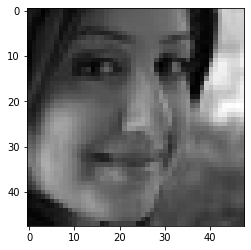

In [ ]:
def show_img(matrix):
  plt.imshow(matrix, cmap="gray")

show_img(pix_str2matrix(faces_df.loc[6900,"pixels"]))

In [ ]:
pix_strings = faces_df.loc[:, "pixels"]
pix_strings

0        129 128 128 126 127 130 133 135 139 142 145 14...
1        164 74 111 168 169 171 175 182 184 188 193 199...
2        67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3        193 197 198 200 199 200 202 203 204 205 208 21...
4        202 205 209 210 209 209 210 211 212 214 218 21...
                               ...                        
23700    127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701    23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702    59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703    45 108 120 156 206 197 140 180 191 199 204 207...
23704    156 161 160 165 170 173 166 177 183 191 187 18...
Name: pixels, Length: 23705, dtype: object

In [ ]:
random.seed(69)
# excluded_rows = random.sample(range(23705), 22705) # keep 1000 images
excluded_rows = []
excluded_rows.sort()
included_rows = list(set(range(23705)) - set(excluded_rows))
included_rows.sort()
# excluded_rows[:30]

In [ ]:
included_rows[:30]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [ ]:
sample_faces_df = faces_df.copy(deep=True)
sample_faces_df = sample_faces_df.drop(axis=0, index=excluded_rows)
sample_faces_df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
sample_faces_df["age"].describe()

count    23705.000000
mean        33.300907
std         19.885708
min          1.000000
25%         23.000000
50%         29.000000
75%         45.000000
max        116.000000
Name: age, dtype: float64

In [ ]:
sample_faces_df["gender"].describe()

count    23705.000000
mean         0.477283
std          0.499494
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: gender, dtype: float64

In [ ]:
sample_faces_df = sample_faces_df.drop(['ethnicity','gender','img_name'], axis=1)
sample_faces_df.head()

,age,pixels
0,1,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
sample_faces_df = sample_faces_df[['age', 'pixels']]
sample_faces_df.head()

,age,pixels
0,1,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,202 205 209 210 209 209 210 211 212 214 218 21...


In [ ]:
for i in sample_faces_df.index.values:
  sample_faces_df['pixels'][i] = pix_str2matrix(sample_faces_df['pixels'][i])
sample_faces_df.head()

In [ ]:
count = 0
for img in sample_faces_df["pixels"]:
  cv2.imwrite(f"drive/Shared drives/cs_for_inquiry/data/img_{count}.jpg", img)
  count += 1

In [ ]:
im_names = []
for i in range(len(sample_faces_df)):
  im_names.append(f"img_{i}.jpg")
with_fname = sample_faces_df.copy(deep=True)
with_fname["fname"] = im_names
with_fname.head()

,age,pixels,fname
0,1,129 128 128 126 127 130 133 135 139 142 145 14...,img_0.jpg
1,1,164 74 111 168 169 171 175 182 184 188 193 199...,img_1.jpg
2,1,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,img_2.jpg
3,1,193 197 198 200 199 200 202 203 204 205 208 21...,img_3.jpg
4,1,202 205 209 210 209 209 210 211 212 214 218 21...,img_4.jpg


In [ ]:
with_fname = with_fname.drop('pixels', axis=1)
with_fname.head()

,age,fname
0,1,img_0.jpg
1,1,img_1.jpg
2,1,img_2.jpg
3,1,img_3.jpg
4,1,img_4.jpg


In [ ]:
! cd ./

In [ ]:
with_fname.to_csv("drive/Shared drives/cs_for_inquiry/labels.csv")